In [1]:
# import libriaries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diamonds = pd.read_csv("./datasets/diamonds/diamonds.csv")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70


In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 390.8+ KB


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


In [5]:
price_less_zero = diamonds[diamonds['price'] < 0] 
   
print('\nResult dataframe :\n', price_less_zero)


Result dataframe :
       carat        cut color clarity  depth  table  price     x     y     z
331    1.00       Good     F     SI1   64.1   60.0     -1  6.25  6.19  3.99
2121   0.34      Ideal     E     VS2   59.8   56.0     -1  4.55  4.54  2.72
2484   1.75      Ideal     J     SI1   63.3   59.0     -1  7.63  7.57  4.81
2933   1.51      Ideal     H     VS2   62.5   55.0     -1  7.29  7.34  4.57
3155   0.31      Ideal     G     VS2   61.7   57.0     -1  4.33  4.36  2.68
3317   1.02    Premium     D     VS2   59.8   61.0     -1  6.61  6.54  3.93
3445   0.30    Premium     H     SI1   59.3   59.0     -1  4.38  4.36  2.59
3904   0.90  Very Good     G     SI2   64.2   56.0     -1  6.04  6.11  3.90
3980   0.41  Very Good     H     VS2   63.4   58.0     -1  4.77  4.66  2.99
4188   0.79      Ideal     H    VVS1   62.0   56.0     -1  5.92  5.96  3.68


In [6]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
# seeing the min of x,y,z there are some values equals to 0, and it's not possible to have a diamond dimensionless or bidimensional
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["price"]<0].index)

In [8]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,0.794117,61.710844,57.446242,3930.581880,5.726232,5.728821,3.533678
std,0.467981,1.445563,2.259752,3970.923311,1.116257,1.109167,0.688437
min,0.230000,44.000000,51.600000,351.000000,3.860000,3.840000,1.410000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5376.000000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


In [9]:
diamonds.shape

(4989, 10)

<Axes: title={'center': 'Cut'}, xlabel='cut'>

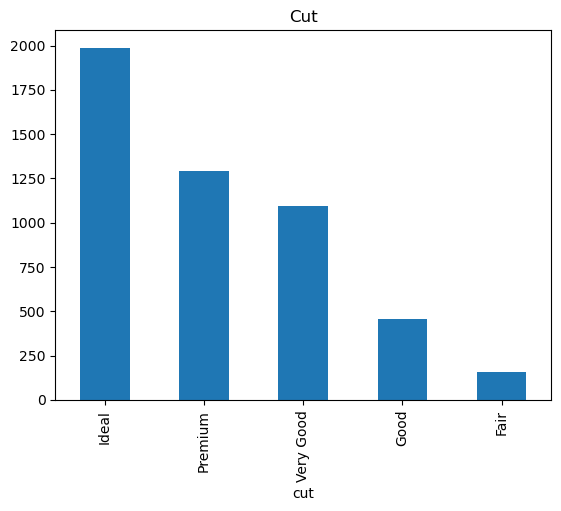

In [10]:
diamonds['cut'].value_counts().plot(kind='bar', title="Cut")

<Axes: title={'center': 'Color'}, xlabel='color'>

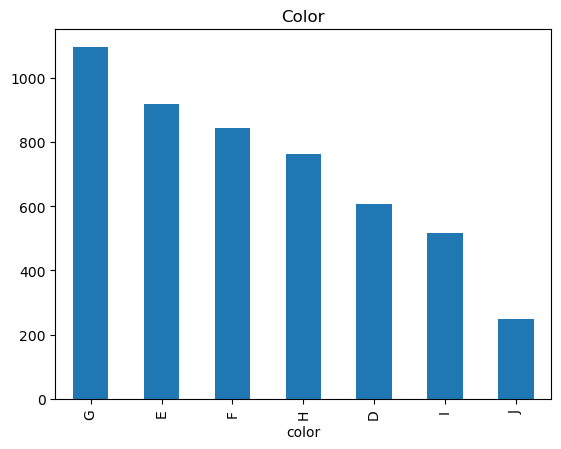

In [11]:
diamonds['color'].value_counts().plot(kind='bar', title="Color")

<Axes: title={'center': 'Clarity'}, xlabel='clarity'>

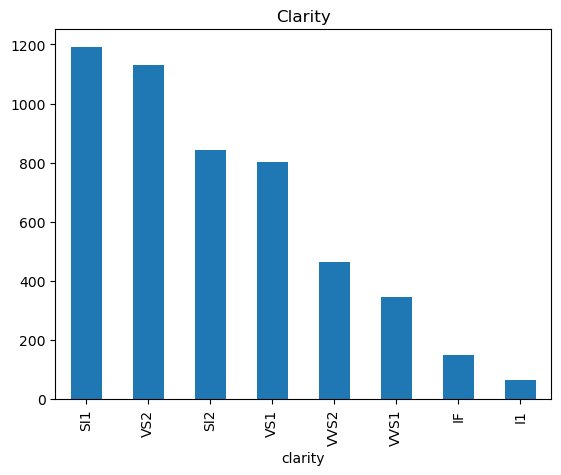

In [12]:
diamonds['clarity'].value_counts().plot(kind='bar', title="Clarity")

In [13]:
diamonds['cut'].replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'],
                 [0,1,2,3,4], inplace=True)
diamonds['color'].replace(['G', 'E', 'F', 'H', 'D', 'I', 'J'],
                 [0,1,2,3,4,5,6], inplace=True)
diamonds['clarity'].replace(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'],
                 [0,1,2,3,4,5,6,7], inplace=True)

In [14]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    4989 non-null   float64
 1   cut      4989 non-null   int64  
 2   color    4989 non-null   int64  
 3   clarity  4989 non-null   int64  
 4   depth    4989 non-null   float64
 5   table    4989 non-null   float64
 6   price    4989 non-null   int64  
 7   x        4989 non-null   float64
 8   y        4989 non-null   float64
 9   z        4989 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 428.7 KB


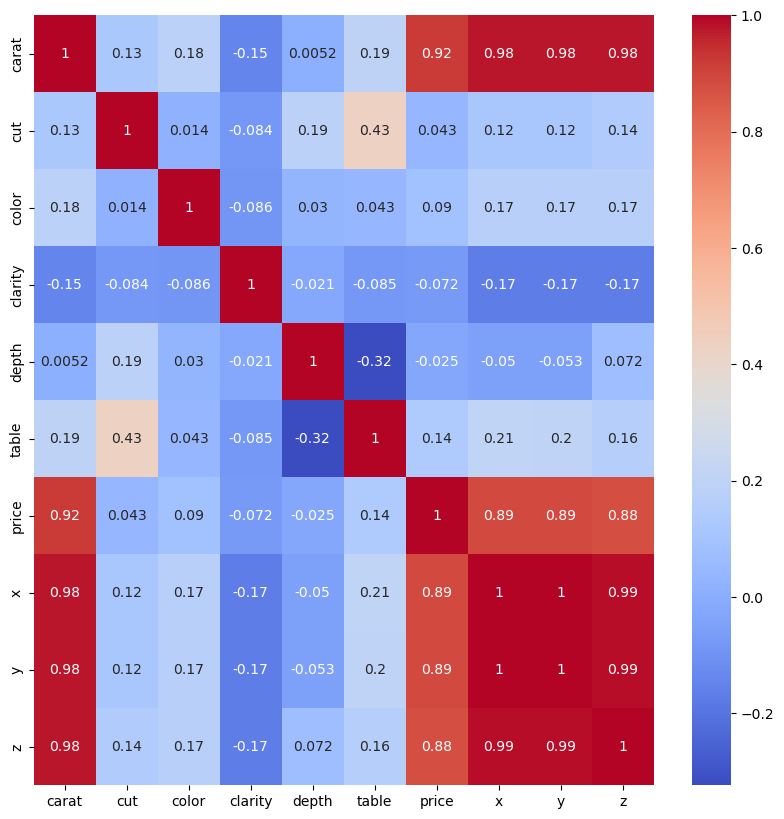

In [15]:
# correlation map

plt.figure(figsize=(10,10))
diamonds_corr_matrix = diamonds.corr()
sns.heatmap(diamonds_corr_matrix, cmap='coolwarm', annot=True)
plt.show()

C:\Users\como9\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


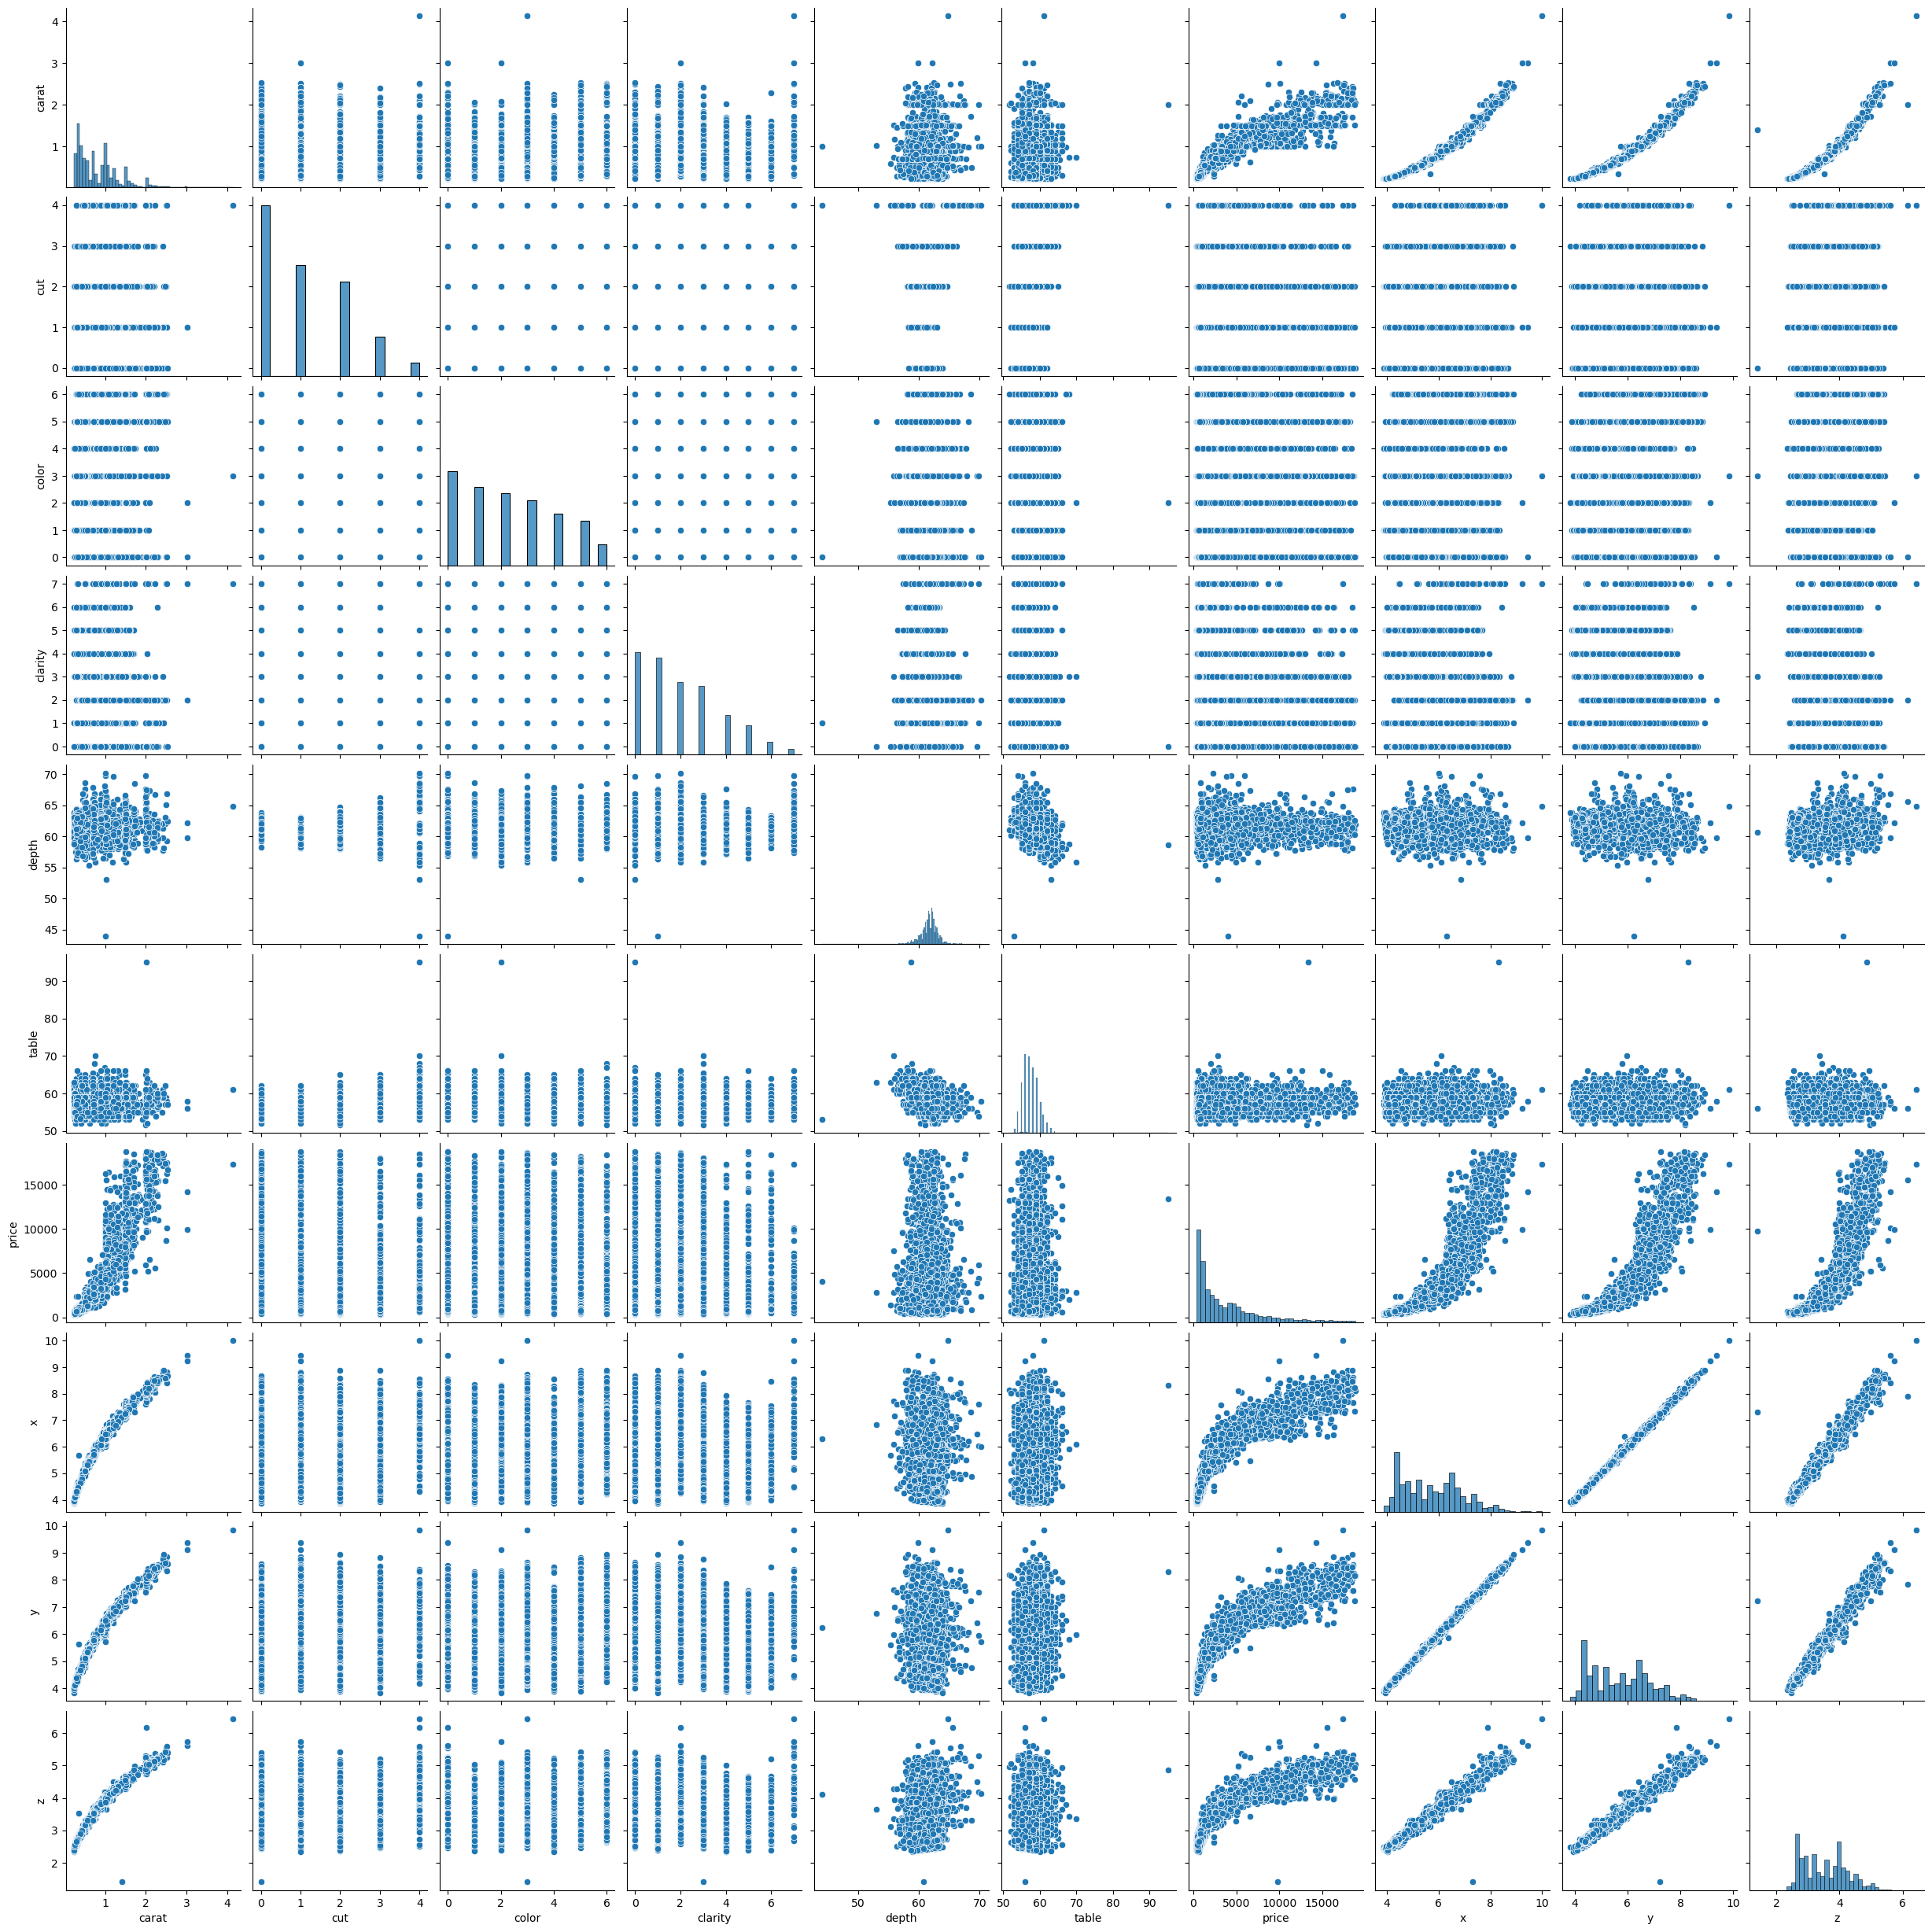

In [16]:
sns.pairplot(diamonds)

In [17]:
# Remove Outliers with Interquartile Range

# Calculate Q1 and Q3
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Make a dataset with the outliers
IQR_outliers = diamonds[((diamonds < (Q1 - 1.5 * IQR)) |(diamonds > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_outliers

,carat,cut,color,clarity,depth,table,price,x,y,z
8,2.01,1,0,2,61.2,57.2,18705,8.08,8.14,4.97
15,2.01,1,5,0,61.5,60.0,16499,8.12,8.01,4.96
18,2.50,4,0,7,65.1,59.0,8711,8.55,8.39,5.53
21,1.70,0,0,5,61.0,56.0,18445,7.67,7.62,4.66
40,1.50,1,2,4,58.8,58.0,17203,7.51,7.43,4.39
...,...,...,...,...,...,...,...,...,...,...
4962,1.69,1,2,1,58.7,59.0,16583,7.87,7.78,4.59
4964,2.21,1,0,2,60.7,62.0,15970,8.48,8.42,5.13
4975,0.70,3,1,3,57.2,62.0,2782,5.81,5.77,3.31
4977,2.07,1,6,1,61.5,59.0,13800,8.20,8.16,5.03


In [20]:
# Remove outliers
diamonds_without_outliers = diamonds[~((diamonds < (Q1 - 1.5 * IQR)) |(diamonds > (Q3 + 1.5 * IQR))).any(axis=1)]
diamonds_without_outliers.shape

(4374, 10)

<Axes: >

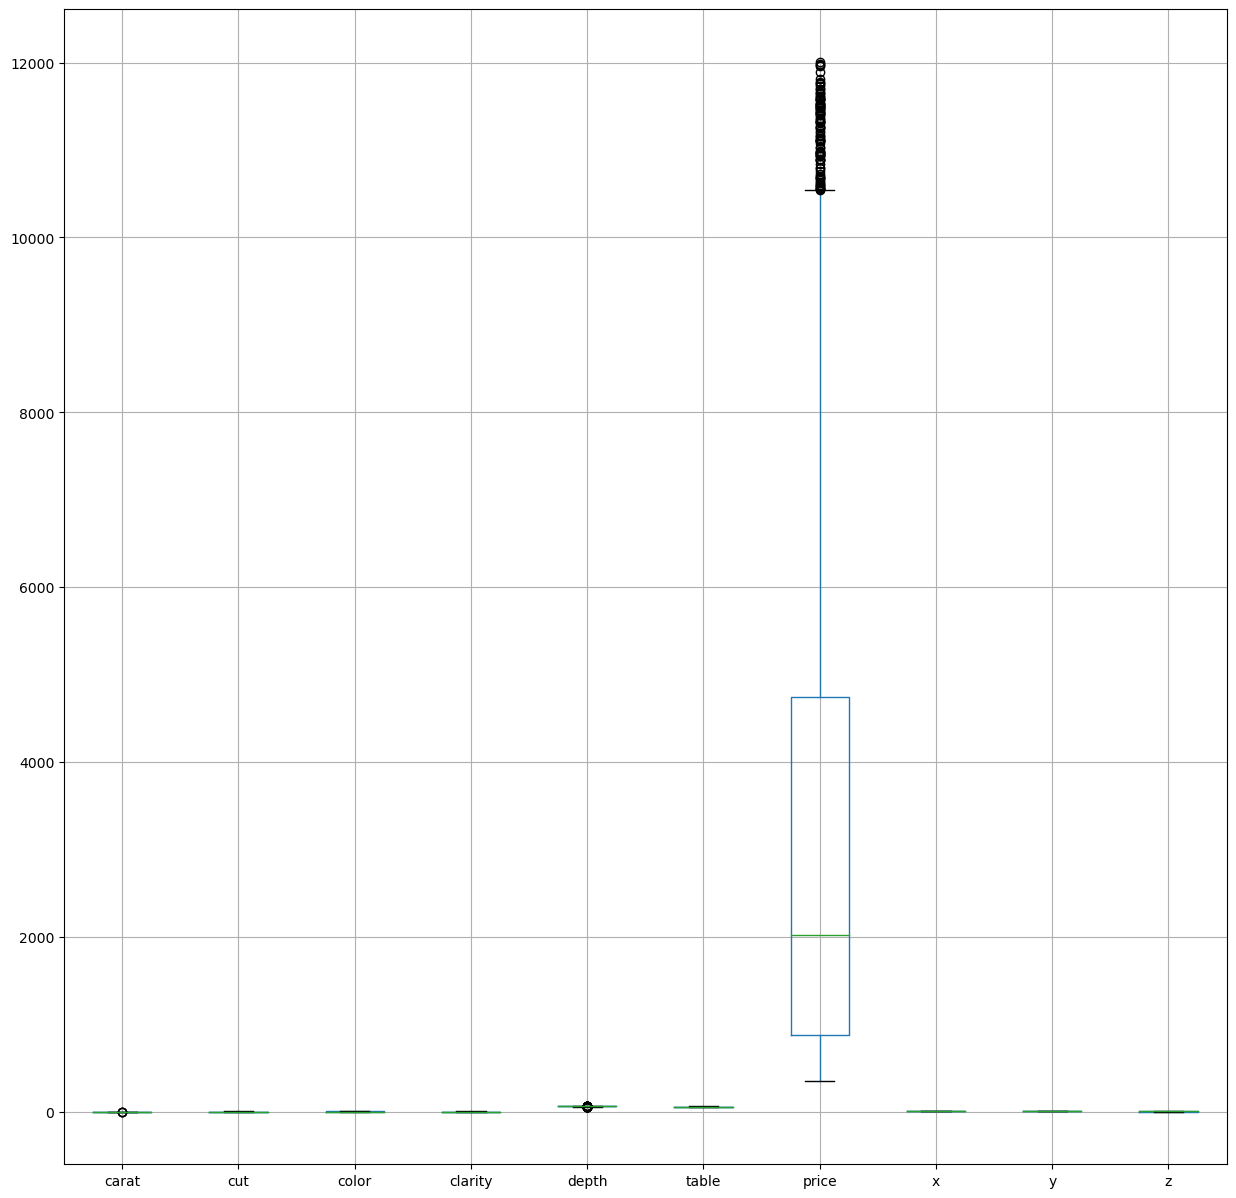

In [24]:
diamonds_without_outliers.boxplot(figsize=(15,15))

In [25]:
diamonds_without_outliers.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000,4374.000000
mean,0.706223,0.985139,2.246456,2.003887,61.773160,57.232533,3140.615912,5.539232,5.545203,3.422570
std,0.371201,1.021833,1.812647,1.713330,1.100526,2.013778,2796.358611,0.983725,0.979927,0.607581
min,0.230000,0.000000,0.000000,0.000000,58.800000,52.000000,351.000000,3.860000,3.840000,1.410000
25%,0.370000,0.000000,1.000000,1.000000,61.100000,56.000000,877.000000,4.620000,4.620000,2.840000
50%,0.590000,1.000000,2.000000,2.000000,61.800000,57.000000,2022.000000,5.410000,5.430000,3.320000
75%,1.010000,2.000000,4.000000,3.000000,62.500000,59.000000,4741.500000,6.410000,6.420000,3.980000
max,2.000000,4.000000,6.000000,6.000000,64.700000,63.000000,12009.000000,8.130000,8.050000,5.040000


In [ ]:
# models 